# Analysis - Genres

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import make_interp_spline
import matplotlib as mpl

person = "ole"
sns.set_theme(style="whitegrid", palette="pastel")
data_source = "./spotify_downloads/" + person

## 1. Most heared Genres

In [ ]:
df_artist_genre = pd.read_csv(data_source + "/artist_genre.csv").rename({"uri": "artist_uri"}, axis=1)
df_history = pd.read_csv(data_source + "/history_isrc.csv")#.drop(["username", "platform", "ip_addr_decrypted", "user_agent_decrypted", "master_metadata_album_artist_name", "master_metadata_album_album_name", "episode_name", "episode_show_name", "spotify_episode_uri", "offline", "offline_timestamp", "incognito_mode"], axis=1)
df_artist_track = pd.read_csv(data_source + "/artist_track.csv")#.drop(["Unnamed: 0"], axis=1)

In [93]:
df_plays_per_artist = df_artist_track.groupby("artist_uri").count().sort_values("isrc", ascending=False).reset_index()
df_plays_per_artist.head()

,artist_uri,isrc
0,spotify:artist:1aS5tqEs9ci5P9KD9tZWa6,187
1,spotify:artist:5pVRwX5ZQR7hfJ18w8ZYkl,178
2,spotify:artist:5eioJDe26lOqkAMbuhzZYs,138
3,spotify:artist:1VPmR4DJC1PlOtd0IADAO0,118
4,spotify:artist:3TVXtAsR1Inumwj472S9r4,115


In [94]:
df_artist_genre.head()

,artist_uri,genre
0,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,detroit hip hop
1,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,hip hop
2,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,rap
3,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,barbadian pop
4,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,pop


In [95]:
df_plays_per_genre = pd.merge(df_artist_genre, df_plays_per_artist, how="inner", on="artist_uri")[["genre", "isrc"]].groupby("genre").sum().reset_index().sort_values(by="isrc", ascending=False).rename({"isrc": "plays"}, axis=1)
df_plays_n = df_plays_per_genre[3:13]

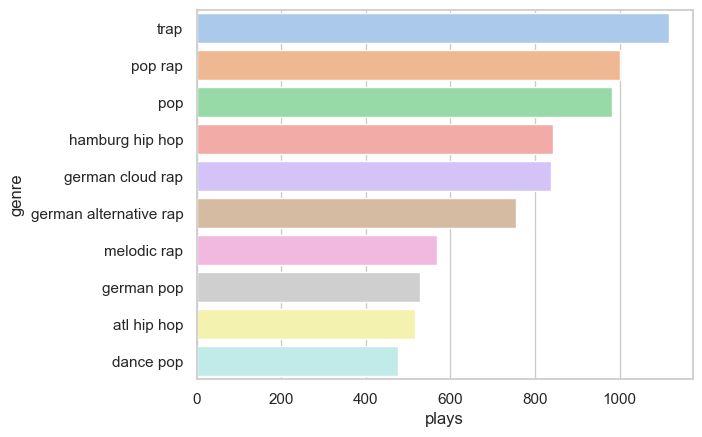

In [96]:
sns.barplot(y=df_plays_n["genre"], x=df_plays_n["plays"])
plt.savefig("./top_genres.png", transparent=True)

## 2. Listening behavior of top n genres over time

In [97]:
df_history = pd.read_csv("./spotify_downloads/" + person + "/history_isrc.csv")#.drop(["Unnamed: 0", "username", "platform", "ip_addr_decrypted", "user_agent_decrypted", "master_metadata_album_artist_name", "master_metadata_album_album_name", "episode_name", "episode_show_name", "spotify_episode_uri", "offline", "offline_timestamp", "incognito_mode"], axis=1).rename({"spotify_track_uri":"track_uri"}, axis=1)
df_history["ts"] = pd.to_datetime(df_history["ts"])
df_history.head(3)

C:\Users\olevo\AppData\Local\Temp\ipykernel_15700\1693474149.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_history = pd.read_csv("./spotify_downloads/" + person + "/history_isrc.csv")#.drop(["Unnamed: 0", "username", "platform", "ip_addr_decrypted", "user_agent_decrypted", "master_metadata_album_artist_name", "master_metadata_album_album_name", "episode_name", "episode_show_name", "spotify_episode_uri", "offline", "offline_timestamp", "incognito_mode"], axis=1).rename({"spotify_track_uri":"track_uri"}, axis=1)


,ts,username,platform,ms_played,conn_country,track_name,album_name,track_uri,reason_start,reason_end,shuffle,skipped,offline_timestamp,isrc
0,2015-06-08 20:41:05+00:00,robert.w01,"Android OS 4.2.2 API 17 (samsung, GT-I8200N)",12956,DE,Mockingbird,Curtain Call,spotify:track:17baAghWcrewNOcc9dCewx,trackdone,fwdbtn,False,1.0,0.0,USIR10400813
1,2015-06-08 20:41:20+00:00,robert.w01,"Android OS 4.2.2 API 17 (samsung, GT-I8200N)",16114,DE,The Monster,The Marshall Mathers LP2,spotify:track:5U8hKxSaDXB8cVeLFQjvwx,fwdbtn,fwdbtn,False,1.0,0.0,USUM71314082
2,2015-06-08 20:41:21+00:00,robert.w01,"Android OS 4.2.2 API 17 (samsung, GT-I8200N)",2368,DE,Survival,The Marshall Mathers LP2,spotify:track:29Key5Lj0YlIMH8JzRDy6U,fwdbtn,fwdbtn,False,1.0,0.0,USUM71312879


In [98]:
df_history_genre = df_history.merge(df_artist_track, how="left", on="isrc").merge(df_artist_genre, how="left", on="artist_uri")
df_history_genre.head(3)

,ts,username,platform,ms_played,conn_country,track_name,album_name,track_uri,reason_start,reason_end,shuffle,skipped,offline_timestamp,isrc,artist_uri,genre
0,2015-06-08 20:41:05+00:00,robert.w01,"Android OS 4.2.2 API 17 (samsung, GT-I8200N)",12956,DE,Mockingbird,Curtain Call,spotify:track:17baAghWcrewNOcc9dCewx,trackdone,fwdbtn,False,1.0,0.0,USIR10400813,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,detroit hip hop
1,2015-06-08 20:41:05+00:00,robert.w01,"Android OS 4.2.2 API 17 (samsung, GT-I8200N)",12956,DE,Mockingbird,Curtain Call,spotify:track:17baAghWcrewNOcc9dCewx,trackdone,fwdbtn,False,1.0,0.0,USIR10400813,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,hip hop
2,2015-06-08 20:41:05+00:00,robert.w01,"Android OS 4.2.2 API 17 (samsung, GT-I8200N)",12956,DE,Mockingbird,Curtain Call,spotify:track:17baAghWcrewNOcc9dCewx,trackdone,fwdbtn,False,1.0,0.0,USIR10400813,spotify:artist:7dGJo4pcD2V6oG8kP0tJRR,rap


In [99]:
hour_groups = df_history_genre.genre.groupby([df_history_genre.ts.dt.hour]).value_counts().groupby(level=0, group_keys=False).head(5).to_frame()
hour_groups = hour_groups.reset_index()
#hour_groups = hour_groups[hour_groups.ts <= 6]

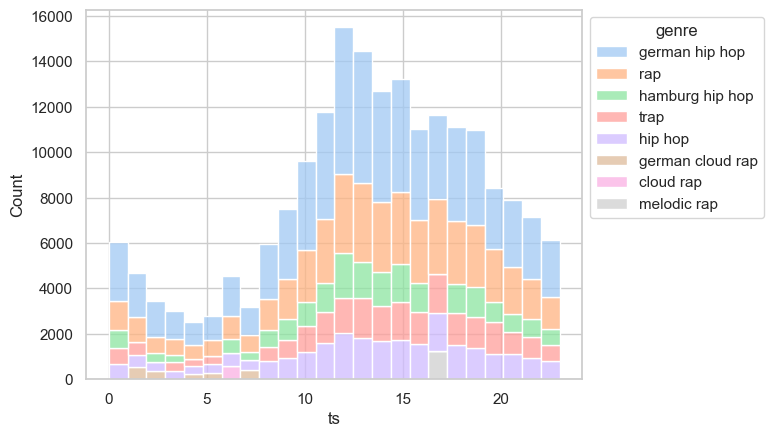

In [100]:
ax = sns.histplot(hour_groups, x="ts", hue="genre", weights="count", multiple="stack", bins=24)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [50]:
df_genre_timeline = df_history_genre.groupby([df_history_genre["ts"].dt.year, df_history_genre["ts"].dt.month, "genre"]).size().to_frame("count")
df_genre_timeline.index.set_names(["year", "month", "genre"], inplace=True)
df_genre_timeline["share"] = df_genre_timeline.groupby(["year", "month"]).transform("sum")
df_genre_timeline["share"] = df_genre_timeline.apply(lambda x: (x["count"]/x["share"]), axis=1)
df_genre_timeline.reset_index(inplace=True)
df_genre_timeline.index.name = "id"

In [51]:
#df_genre_timeline = df_genre_timeline.reset_index()
df_genre_timeline["date"] = pd.to_datetime(df_genre_timeline["year"].astype(str) + "-" + df_genre_timeline["month"].astype(str))
df_genre_timeline = df_genre_timeline.drop(["year", "month"], axis=1)
df_genre_timeline = df_genre_timeline[df_genre_timeline["genre"] != "pop"]

In [52]:
top_genres_per_year = df_genre_timeline.loc[df_genre_timeline.groupby([df_genre_timeline["date"].dt.year])['share'].idxmax()]
top_genres_per_year["year"] = top_genres_per_year["date"].map(lambda x: x.year)
top_genres_per_year.drop(["date"], inplace=True, axis=1)
top_genres_per_year.head(3)

,genre,count,share,year
id,,,,
19,hip pop,11,0.068323,2016
83,british soul,22,0.178862,2018
1438,hollywood,653,0.074509,2019


In [86]:
top_genres_per_year["percent"] = top_genres_per_year.share.apply(lambda r: round(r * 100, 2))
top_genres_per_year[["genre", "percent", "year"]]

,genre,percent,year
id,,,
19,hip pop,6.83,2016
83,british soul,17.89,2018
1438,hollywood,7.45,2019
5915,rap,8.92,2020
12993,rap,12.09,2021
17333,german hip hop,6.44,2022
23182,german hip hop,6.98,2023
24040,neue neue deutsche welle,8.20,2024


In [53]:
top_n_genres = df_plays_n["genre"].to_numpy()
plot_data = df_genre_timeline[df_genre_timeline["genre"].isin(top_n_genres)]

<Axes: xlabel='date', ylabel='share'>

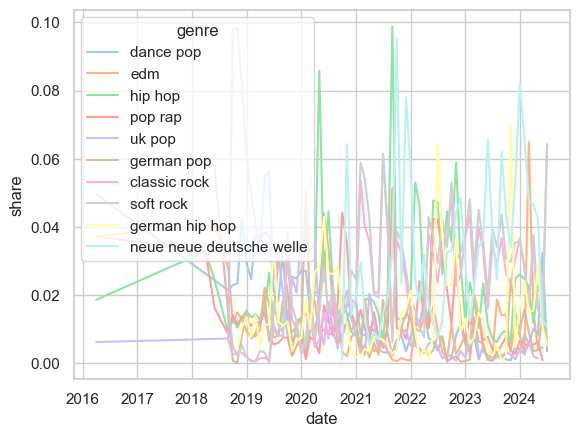

In [54]:
sns.lineplot(data=plot_data, x="date", y="share", hue="genre")

### Genre bump chart

In [55]:
nlargest_per_year = df_genre_timeline.sort_values("count", ascending=False).groupby([df_genre_timeline["date"].dt.year, "genre"])["count"].sum().to_frame().reset_index().sort_values("count", ascending=False).groupby("date").head(5).sort_values("date")
nlargest_per_year["rank"] = nlargest_per_year.groupby("date")["count"].rank(method="min", ascending=False)
nlargest_per_year[nlargest_per_year["date"] == 2015].sort_values("rank")

,date,genre,count,rank


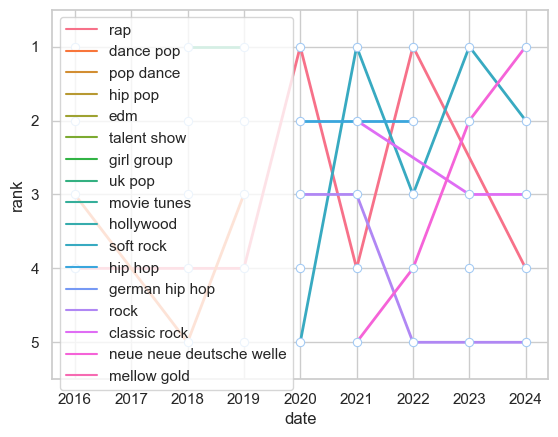

In [56]:
sns.lineplot(x="date", y="rank", data=nlargest_per_year, marker="o", linestyle="-", mfc="w", hue="genre", markersize=6, linewidth=2, markeredgecolor="b")
plt.legend(markerscale=2)
plt.ylim(0.5, 0.5 + 5)
plt.gca().invert_yaxis()
plt.show()